# Data analysis and predictions on activated employment relationships
The purpose of this notebook is to have a view of the data contained in the **Rapporti_di_lavoro_attivati.csv** dataset.
In particular we want to:
* Analyse the data.
* Add data from another dataset to increase the amount of information.
* Make some transformations in order to prepare data for Machine Learning.
* Try to find correlations within data.
* Try to make some predictions. 

### RESEARCH QUESTION
We want to see if it is possible to predict the study title, basing on the features stored in the **Rapporti_di_lavoro_attivati.csv** dataset. We will try to find the best feaures to use for this purpose through analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import utils
from matplotlib import rcParams
from tqdm import tqdm

a4_dims = (11.7, 8.27)
rcParams['figure.figsize'] = a4_dims

STD_SIZE = (15, 10)
MID_SIZE = (20, 25)
BIG_SIZE = (30, 30)

## Have a first view of the dataset

Import the dataset

In [2]:
activated_labours = pd.read_csv('datasets/Rapporti_di_lavoro_attivati.csv', parse_dates=['DATA'])
print(f'Shape: {activated_labours.shape}')
activated_labours.head()

Shape: (9579794, 9)


,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,2020-09-05,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,2019-12-07,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,2013-05-06,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,2010-12-03,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,2021-06-04,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


Inspect data types

In [3]:
activated_labours.dtypes

DATA                         datetime64[ns]
GENERE                               object
ETA                                   int64
SETTOREECONOMICODETTAGLIO            object
TITOLOSTUDIO                         object
CONTRATTO                            object
MODALITALAVORO                       object
PROVINCIAIMPRESA                     object
ITALIANO                             object
dtype: object

In [4]:
len(activated_labours)

9579794

Some general information

In [5]:
activated_labours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   DATA                       datetime64[ns]
 1   GENERE                     object        
 2   ETA                        int64         
 3   SETTOREECONOMICODETTAGLIO  object        
 4   TITOLOSTUDIO               object        
 5   CONTRATTO                  object        
 6   MODALITALAVORO             object        
 7   PROVINCIAIMPRESA           object        
 8   ITALIANO                   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 657.8+ MB


### Sort records basing on **DATA** column

Sorting the data with respect to the **DATA** column is only required for making some time series analysis, which will be eventually performed later on.

In [6]:
activated_labours['DATA'].head()

0   2020-09-05
1   2019-12-07
2   2013-05-06
3   2010-12-03
4   2021-06-04
Name: DATA, dtype: datetime64[ns]

Sort basing on dates

In [7]:
activated_labours = activated_labours.sort_values(by='DATA', ascending=True)
activated_labours.reset_index(drop=True, inplace=True)
min_ok = activated_labours.DATA.min() == activated_labours.DATA[0]
max_ok = activated_labours.DATA.max() == activated_labours.DATA[len(activated_labours) - 1]
print('Sorted' if min_ok and max_ok else 'Not sorted')

Sorted


## Inspection of null values

In [8]:
utils.missing_values_table(activated_labours)

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
MODALITALAVORO,440779,4.6
SETTOREECONOMICODETTAGLIO,2888,0.0
TITOLOSTUDIO,580,0.0


Only three columns contains null values... Let's inspect more deeply how could i remove them.

### TITOLO DI STUDIO

In [9]:
activated_labours.loc[:, ['TITOLOSTUDIO']].value_counts()

TITOLOSTUDIO                                                                                                           
NESSUN TITOLO DI STUDIO                                                                                                    2721891
LICENZA MEDIA                                                                                                              2523342
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA                                          2430781
LAUREA - Vecchio o nuovo ordinamento                                                                                        988171
TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()     645228
LICENZA ELEMENTARE                                                                                                           82570
DIPLOMA UNIVERSITARIO                                                                         

I'll fill in all the null values in the **TITOLO DI STUDIO** column with the **NESSUN TITOLO DI STUDIO** value

In [10]:
activated_labours.TITOLOSTUDIO.fillna('NESSUN TITOLO DI STUDIO', inplace=True)

/home/ale/anaconda3/envs/datasciencefb/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


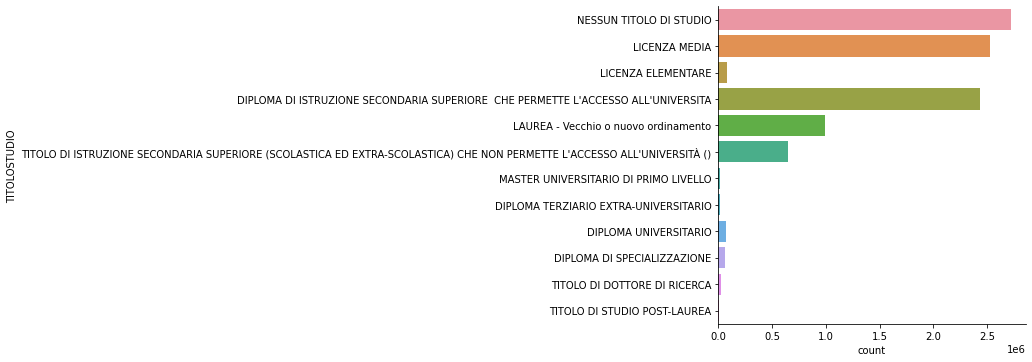

In [11]:
sns.catplot(data=activated_labours, y='TITOLOSTUDIO', kind='count')

In [12]:
utils.missing_values_table(activated_labours)

Your selected dataframe has 9 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
MODALITALAVORO,440779,4.6
SETTOREECONOMICODETTAGLIO,2888,0.0


### SETTORE ECONOMICO DETTAGLIO

In [13]:
counts = activated_labours.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()
counts

SETTOREECONOMICODETTAGLIO                                                                                                                                                      
Alberghi                                                                                                                                                                           467057
Ristorazione con somministrazione                                                                                                                                                  445191
Attività di produzione cinematografica, di video e di programmi televisivi                                                                                                         379116
Attività di famiglie e convivenze come datori di lavoro per personale domestico                                                                                                    348181
Altri servizi di supporto alle imprese nca                                      

In [14]:
counts.shape[0]

1224

<BarContainer object of 18 artists>

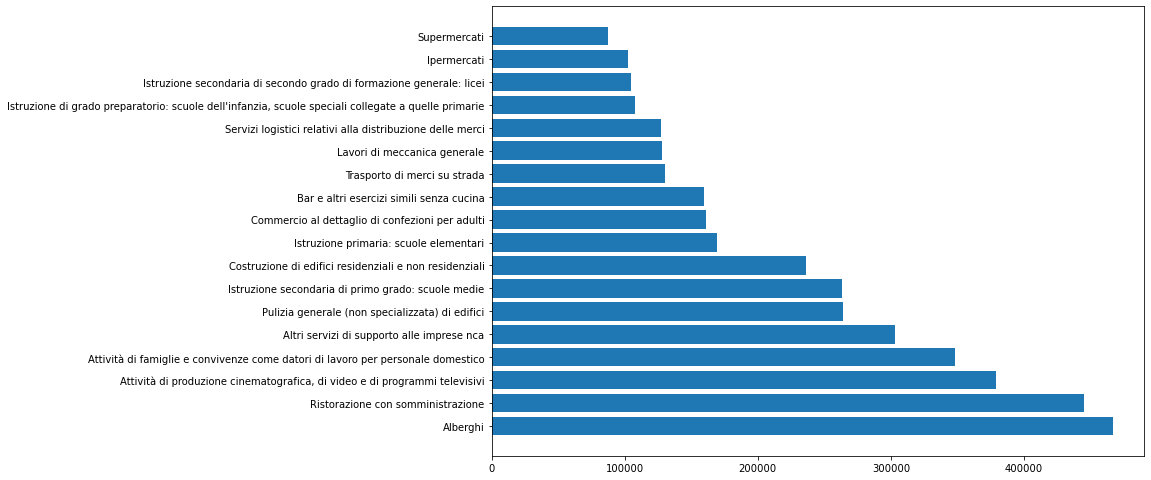

In [15]:
LIMIT = 80000
counts = counts[counts.values > LIMIT]
plt.barh(y=[i[0] for i in counts.index], width=counts.values)

Column **settore economico dettaglio** contains too general information and a lot of values which have a too small amount of count. In order to make an understandable plot i would have to avoid considering too many values, so we'll drop it.

In [16]:
activated_labours.drop(labels=['SETTOREECONOMICODETTAGLIO'], axis=1, inplace=True)

In [17]:
utils.missing_values_table(activated_labours)

Your selected dataframe has 8 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
MODALITALAVORO,440779,4.6


### MODALITA LAVORO

In [18]:
activated_labours.loc[:, ['MODALITALAVORO']].value_counts()

MODALITALAVORO            
TEMPO PIENO                   5337940
TEMPO PARZIALE ORIZZONTALE    2026056
NON DEFINITO                  1087460
TEMPO PARZIALE MISTO           445419
TEMPO PARZIALE VERTICALE       242140
dtype: int64

Fill null values into **modalità lavoro** with value **NON DEFINITO**

In [19]:
activated_labours['MODALITALAVORO'] = activated_labours['MODALITALAVORO'].fillna('NON DEFINITO')
activated_labours['MODALITALAVORO'].isnull().sum()

0

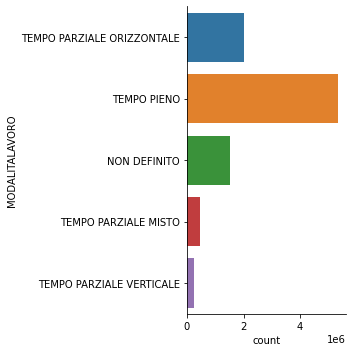

In [20]:
sns.catplot(data=activated_labours, y='MODALITALAVORO', kind='count')

In [21]:
utils.missing_values_table(activated_labours)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Now the dataframe contains **0** null values.

### Duplicated records

In [22]:
activated_labours.duplicated().sum()

2536002

the presence of duplicated lines is not meaningful because there could be different people with same characteristics having activated a labour in the same day

Rename column **ITALIANO** into **NAZIONALITA** for better coherence.

In [23]:
activated_labours.rename({'ITALIANO': 'NAZIONALITA'}, axis=1, inplace=True)

## Plots of distribution of data

### Plot of categorical data distributions

['GENERE', 'TITOLOSTUDIO', 'CONTRATTO', 'MODALITALAVORO', 'PROVINCIAIMPRESA', 'NAZIONALITA']


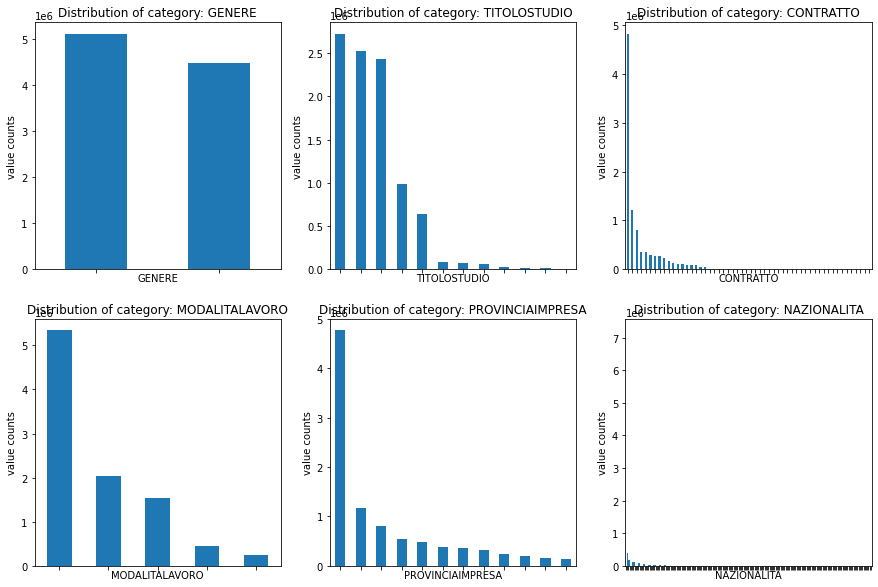

In [24]:
categorical_features = [col for col in activated_labours if activated_labours[col].dtype == 'object']
print(categorical_features)

fig = plt.figure(figsize=STD_SIZE)
for i, category in enumerate(categorical_features):
    ax = fig.add_subplot(2, 3, i+1)
    freqs = activated_labours[category].value_counts()
    freqs.plot.bar(x=freqs.index, y=freqs.values)
    ax.set_title('Distribution of category: %s' % category)
    ax.set_xlabel(category)
    ax.set_ylabel('value counts')
    ax.tick_params(axis='x', labelbottom=False)
plt.show()

### Plot of numerical data distribution

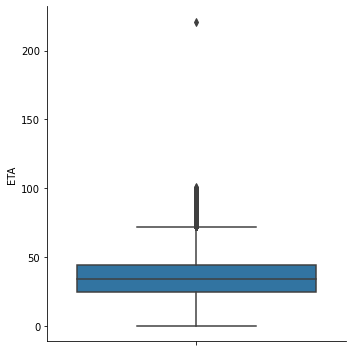

In [25]:
sns.catplot(data=activated_labours, y='ETA', kind='box')

In [26]:
activated_labours.ETA[activated_labours.ETA > 100]

76879      101
9579793    221
Name: ETA, dtype: int64

I remove the pople that have more than 100 years and less than 16 years.

In [30]:
activated_labours = activated_labours[activated_labours.ETA < 100]
activated_labours = activated_labours[activated_labours.ETA > 16]

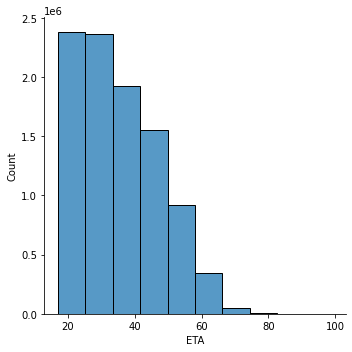

In [31]:
sns.displot(activated_labours.ETA, bins=10)

## Descriptive statistics

The following function prints some useful measures of variability in order to have a clearer understanding of the **ETA** column, which is the only column that contains numerical values.

In [32]:
utils.variability_measures(activated_labours, column='ETA', limit=0.2)

Mean on column ETA: 35.36550037005989
Median on column ETA: 34.0
Mode on column ETA: 0    25
Name: ETA, dtype: int64
Range of values on column ETA: [17, 99]
Variance on column ETA: 137.61784841560717
Standard deviation on column ETA: 11.731063396623819
Trimmed mean on column ETA with limit 0.2: 33.84469154056215
Mean absolute deviation on column ETA: 9.81916196229365
Median absolute deviation on column ETA: 9.734934961882942


In [33]:
# activated_labours.to_csv('./activated_labours_cleaned.csv')

## Add hourly retributions

### Hourly retributions with respect to **GENERE**, **TITOLODISTUDIO** and **ANNO**

In [34]:
retributions = pd.read_csv('datasets/retribuzioni2.csv')
retributions.head(2)

,ITTER107,Territorio,TIPO_DATO7,Tipo dato,SEXISTAT1,Sesso,TITOLO_STUDIO,Titolo di studio,PROFILO_PROF,Qualifica contrattuale,ATECO_2007,Ateco 2007,CLLVT,Classe di dipendenti,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC,Nord-ovest,HOUWAG_ENTEMP_MED_MI,Retribuzione lorda oraria per ora retribuita ...,1,maschi,11,laurea e post-laurea,6,operaio,B,estrazione di minerali da cave e miniere,TOTAL,totale,2014,2014,13.10,NaN,NaN
1,ITC,Nord-ovest,HOUWAG_ENTEMP_MED_MI,Retribuzione lorda oraria per ora retribuita ...,1,maschi,11,laurea e post-laurea,6,operaio,B,estrazione di minerali da cave e miniere,TOTAL,totale,2015,2015,12.44,NaN,NaN


Firstly clean the dataset

In [35]:
retributions.columns

Index(['ITTER107', 'Territorio', 'TIPO_DATO7', 'Tipo dato', 'SEXISTAT1',
       'Sesso', 'TITOLO_STUDIO', 'Titolo di studio', 'PROFILO_PROF',
       'Qualifica contrattuale', 'ATECO_2007', 'Ateco 2007', 'CLLVT',
       'Classe di dipendenti', 'TIME', 'Seleziona periodo', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

Dropping unuseful or duplicated columns.

In [36]:
retributions2 = retributions.drop(['ITTER107', 'TIPO_DATO7', 'Tipo dato', 'SEXISTAT1', 'TITOLO_STUDIO', 'PROFILO_PROF', 'ATECO_2007', 'CLLVT', 'Classe di dipendenti', 'TIME', 'Flag Codes', 'Flags'], axis=1)
retributions2.columns

Index(['Territorio', 'Sesso', 'Titolo di studio', 'Qualifica contrattuale',
       'Ateco 2007', 'Seleziona periodo', 'Value'],
      dtype='object')

In [37]:
retributions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Territorio              9682 non-null   object 
 1   Sesso                   9682 non-null   object 
 2   Titolo di studio        9682 non-null   object 
 3   Qualifica contrattuale  9682 non-null   object 
 4   Ateco 2007              9682 non-null   object 
 5   Seleziona periodo       9682 non-null   int64  
 6   Value                   8758 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 529.6+ KB


Rename column **Seleziona periodo** in **anno**

In [38]:
retributions2.rename({'Seleziona periodo': 'anno'}, axis=1, inplace=True)
retributions2.anno.unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

### Missing values inspection

In [39]:
utils.missing_values_table(retributions2)

Your selected dataframe has 7 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Value,924,9.5


There are some missing values only on the **Values** column. Since there are only a few i'll drop all the rows containig missing values for that column.

In [40]:
retributions3 = retributions2.dropna()

In [41]:
utils.missing_values_table(retributions3)

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


All missing values have been removed

Convert all column names to upper case in order to simplify the join operation

In [42]:
retributions3.columns = retributions3.columns.str.upper()
retributions3.head()

,TERRITORIO,SESSO,TITOLO DI STUDIO,QUALIFICA CONTRATTUALE,ATECO 2007,ANNO,VALUE
0,Nord-ovest,maschi,laurea e post-laurea,operaio,estrazione di minerali da cave e miniere,2014,13.10
1,Nord-ovest,maschi,laurea e post-laurea,operaio,estrazione di minerali da cave e miniere,2015,12.44
5,Nord-ovest,maschi,laurea e post-laurea,operaio,estrazione di minerali da cave e miniere,2019,13.74
9,Nord-ovest,maschi,laurea e post-laurea,apprendista,estrazione di minerali da cave e miniere,2017,19.60
10,Nord-ovest,maschi,laurea e post-laurea,apprendista,estrazione di minerali da cave e miniere,2018,18.24


Since the dataset **rapporti_di_lavoro_attivati** contains only data that makes reference to Lombardy i'll keep only the records which make reference to **NORD-OVEST** as territory.

In [43]:
retributions4 = retributions3[retributions3['TERRITORIO'] == 'Nord-ovest']
retributions4.drop('TERRITORIO', axis=1, inplace=True)

<ipython-input-43-49718a9577b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retributions4.drop('TERRITORIO', axis=1, inplace=True)


Refactoring of some values in order to let them be coherent with tha values of the starting dataframe.

In [44]:
retributions4['SESSO'] = retributions4['SESSO'].replace({'maschi': 'M', 'femmine': 'F'})
retributions4['TITOLO DI STUDIO'] = retributions4['TITOLO DI STUDIO'].str.upper()
retributions4['QUALIFICA CONTRATTUALE'] = retributions4['QUALIFICA CONTRATTUALE'].str.upper()
retributions4['ATECO 2007'] = retributions4['ATECO 2007'].str.upper()

<ipython-input-44-341c6cc61f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retributions4['SESSO'] = retributions4['SESSO'].replace({'maschi': 'M', 'femmine': 'F'})
<ipython-input-44-341c6cc61f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retributions4['TITOLO DI STUDIO'] = retributions4['TITOLO DI STUDIO'].str.upper()
<ipython-input-44-341c6cc61f2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

### Renaming the columns on which i want to make the join

In [45]:
retributions4 = retributions4.rename({'SESSO': 'GENERE',
                      'TITOLO DI STUDIO': 'TITOLOSTUDIO'}, axis=1)
retributions4.columns

Index(['GENERE', 'TITOLOSTUDIO', 'QUALIFICA CONTRATTUALE', 'ATECO 2007',
       'ANNO', 'VALUE'],
      dtype='object')

### Adaptations on rapporti_di_lavoro_attivati.csv dataset
* In order to let the data be correctly joined i need to transform also some data in the **rapporti_di_lavoro_attivati** dataset.
By this way i want to obtain less null values as possible.

Importing...

In [46]:
# activated_cleaned = pd.read_csv('./datasets/activated_labours_cleaned.csv', parse_dates=['DATA'], index_col=0)
# activated_cleaned.head()
activated_cleaned = activated_labours.copy()

Create column **ANNO** for joining purposes

In [47]:
activated_cleaned['ANNO'] = pd.DatetimeIndex(activated_cleaned.DATA).year
activated_cleaned.head()

,DATA,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,ANNO
0,1973-02-01,F,20,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA,1973
1,1974-11-06,F,21,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA,1974
2,1976-01-10,F,21,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA,1976
3,1978-01-05,M,25,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,1978
4,1978-10-07,M,26,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA,1978


### Values reduction

In order to perform the join generating the less null values as possible and to do it in the most coherent way we need to reduce the data of the **TITOLO DI STUDIO** column of the **Rapporti di lavoro attivati** dataset and adapt the ones on the **Retribuzioni** dataset.

In [48]:
activated_cleaned['TITOLOSTUDIO'].unique()

array(['NESSUN TITOLO DI STUDIO', 'LICENZA MEDIA', 'LICENZA ELEMENTARE',
       "DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA",
       'LAUREA - Vecchio o nuovo ordinamento',
       "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()",
       'MASTER UNIVERSITARIO DI PRIMO LIVELLO',
       'DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO', 'DIPLOMA UNIVERSITARIO',
       'DIPLOMA DI SPECIALIZZAZIONE', 'TITOLO DI DOTTORE DI RICERCA',
       'TITOLO DI STUDIO POST-LAUREA'], dtype=object)

In [49]:
retributions4['TITOLOSTUDIO'].unique()

array(['LAUREA E POST-LAUREA', 'DIPLOMA',
       'NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA'],
      dtype=object)

I reduce the values of **TITOLOSTUDIO** in order to increase the compatibility between the two datasets at joining.

In [50]:
study_titles_map = {'NESSUN TITOLO DI STUDIO': 'NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA',
                    'LICENZA MEDIA': 'NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA',
                    'LICENZA ELEMENTARE': 'NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA',
                    'LAUREA': 'LAUREA E POST-LAUREA',
                    'LAUREA - Vecchio o nuovo ordinamento': 'LAUREA E POST-LAUREA',
                    'TITOLO DI STUDIO POST-LAUREA': 'LAUREA E POST-LAUREA',
                    'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L\'ACCESSO ALL\'UNIVERSITA': 'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO',
                    'DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO': 'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO',
                    'DIPLOMA UNIVERSITARIO' : 'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO'}
activated_cleaned['TITOLOSTUDIO'] = activated_cleaned['TITOLOSTUDIO'].replace(study_titles_map)
activated_cleaned['TITOLOSTUDIO'].unique()

array(['NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA',
       'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO',
       'LAUREA E POST-LAUREA',
       "TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()",
       'MASTER UNIVERSITARIO DI PRIMO LIVELLO',
       'DIPLOMA DI SPECIALIZZAZIONE', 'TITOLO DI DOTTORE DI RICERCA'],
      dtype=object)

Modify also a value in the **retribuzioni** dataset.

In [51]:
retributions4['TITOLOSTUDIO'] = retributions4['TITOLOSTUDIO'].replace({'DIPLOMA': 'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO'})
retributions4['TITOLOSTUDIO'].unique()

array(['LAUREA E POST-LAUREA',
       'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO',
       'NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA'],
      dtype=object)

Now we need to see in which interval of years we have data in both the considered datasets.  

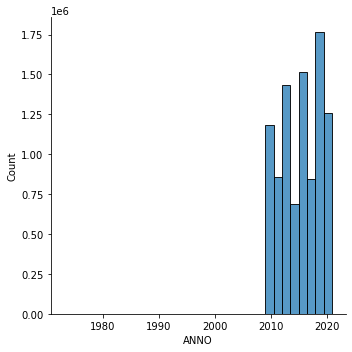

In [52]:
sns.displot(data=activated_cleaned, x='ANNO', bins=32)

Since the **Retribuzioni** dataset contains only records which make reference to the period between **2014** and **2019**, i'll keep only the values that are part of this time interval. Everyway, from the plot above, it is easy to see that the amount of information for years before **2010** is not relevant and by considering only the selected interval the **left skew** will be removed.

In [53]:
activated_cleaned = activated_cleaned[activated_cleaned['ANNO'].isin([2014, 2015, 2016, 2017, 2018, 2019])]
activated_cleaned.reset_index(inplace=True)
activated_cleaned.ANNO.unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

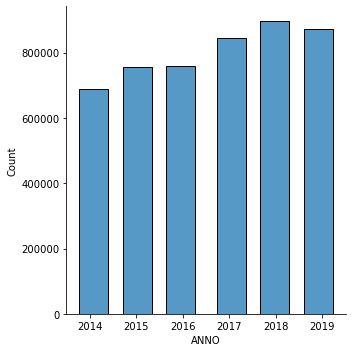

In [54]:
sns.displot(data=activated_cleaned, x='ANNO', bins=32, shrink=4)

Drop columns which contain information that are already present in the **Rapporti di lavoro attivati** datase.

In [55]:
retributions4.drop(['QUALIFICA CONTRATTUALE', 'ATECO 2007'], axis=1, inplace=True)
retributions4.columns

Index(['GENERE', 'TITOLOSTUDIO', 'ANNO', 'VALUE'], dtype='object')

### Make the join

Before performing the join we will check the data have been prepared correctly.
First find out if it the columns in common between the two datasets are the ones which we expected.

In [56]:
intersection = []
for col in retributions4.columns:
    if col in activated_cleaned.columns:
        intersection.append(col)
intersection

['GENERE', 'TITOLOSTUDIO', 'ANNO']

**GENERE**, **TITOLOSTUDIO** and **ANNO** are effectively the columns on which we want to perform the join.

Then check that the dataset **Rapporti di lavoro attivati** contains at least all the values that are contained in the **Retribuzioni** dataset for the columns selected for the join.

In [57]:
contained1 = True
for value in retributions4['GENERE'].unique():
    if value not in activated_cleaned['GENERE'].unique():
        contained1 = False
        print(value)
        
contained2 = True
for value in retributions4['TITOLOSTUDIO'].unique():
    if value not in activated_cleaned['TITOLOSTUDIO'].unique():
        contained2 = False
        print(value)
        
contained3 = True
for value in retributions4['ANNO'].unique():
    if value not in activated_cleaned['ANNO'].unique():
        contained3 = False
        print(value)
        
print(contained1, contained2, contained3)

True True True


In [58]:
# activated_cleaned.to_csv('datasets/activated_cleaned_adapted2.csv')
# retributions4.to_csv('datasets/retributions4.csv')

Keep a sample of the data in order to be possible for us to perform the join. Otherwise the procedure would require memory and time to be performed.
After some trial and error we will keep **30%** of the data in the **Rapporti di lavoro attivati** dataset. 

In [59]:
activated_sampled = activated_cleaned.sample(frac=0.3)
activated_sampled.shape[0]

1445276

JOIN

In [60]:
# labours_merge = pd.merge(activated_sampled, retributions4, how='left', on=intersection)

After the merging operation the dataset contains **68647352** records. 
We need to perform another **sample at constant rate** in order to reduce this quantity to **4576491** which is an easier to handle amount of data.

In [61]:
# labours_sampled2 = labours_merge[::15]
activated_cleaned = pd.read_csv('datasets/merged_and_sampled3.csv')
activated_cleaned.drop('Unnamed: 0', axis=1, inplace=True)
activated_cleaned.head()

,DATA,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,ANNO,VALUE
0,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,9.52
1,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,9.49
2,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,11.51
3,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,9.80
4,2014-01-01,M,43,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,LIBERIA,2014,15.82


Now it is important to see if the sample and the merging have produced consistent results. For this purpose we make a comparison with the variability measures computed at the beginning of the dataset (here reported) with the one computed in the sample of data after merging...
* Mean on column ETA: 35.36550037005989
* Median on column ETA: 34.0
* Mode on column ETA: 0    25
* Name: ETA, dtype: int64
* Range of values on column ETA: [17, 99]
* Variance on column ETA: 137.61784841560717
* Standard deviation on column ETA: 11.731063396623819
* Trimmed mean on column ETA with limit 0.2: 33.84469154056215
* Mean absolute deviation on column ETA: 9.81916196229365
* Median absolute deviation on column ETA: 9.734934961882942

... then we have a look at the distributions of the categorical variables as it has been done bofore.

In [62]:
utils.variability_measures(activated_cleaned, column='ETA', limit=0.2)

Mean on column ETA: 35.74668632659715
Median on column ETA: 34.0
Mode on column ETA: 0    25
Name: ETA, dtype: int64
Range of values on column ETA: [17, 98]
Variance on column ETA: 141.35601922397558
Standard deviation on column ETA: 11.889323749649328
Trimmed mean on column ETA with limit 0.2: 34.25439148385082
Mean absolute deviation on column ETA: 10.009917656556917
Median absolute deviation on column ETA: 9.929994494037505


The variability measures before and after the sample are similar. Have a look also at the distribution of the categorical variables.

['GENERE', 'TITOLOSTUDIO', 'CONTRATTO', 'MODALITALAVORO', 'PROVINCIAIMPRESA', 'NAZIONALITA']


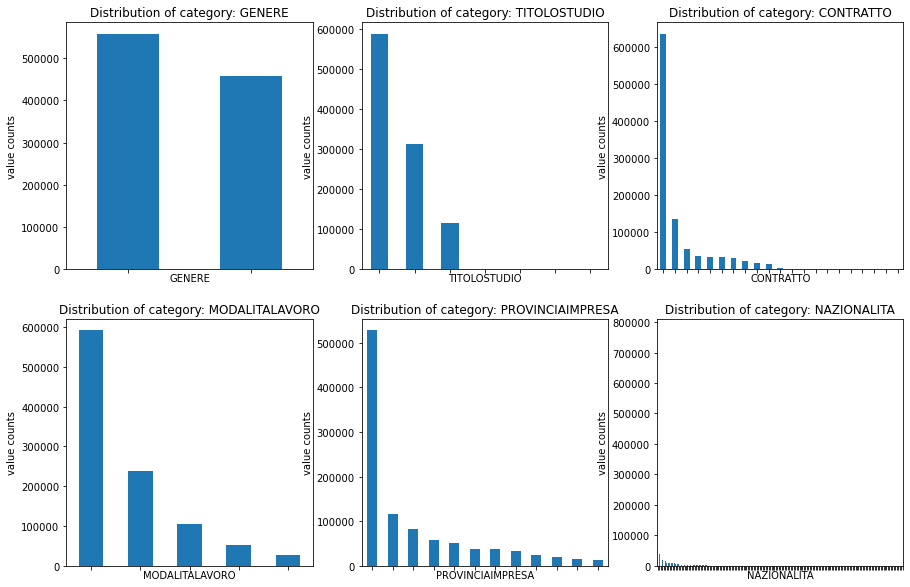

In [63]:
categorical_features = [col for col in activated_cleaned.drop('DATA', axis=1) if activated_cleaned[col].dtype == 'object']
print(categorical_features)

fig = plt.figure(figsize=STD_SIZE)
for i, category in enumerate(categorical_features):
    ax = fig.add_subplot(2, 3, i+1)
    freqs = activated_cleaned[category].value_counts()
    freqs.plot.bar(x=freqs.index, y=freqs.values)
    ax.set_title('Distribution of category: %s' % category)
    ax.set_xlabel(category)
    ax.set_ylabel('value counts')
    ax.tick_params(axis='x', labelbottom=False)
plt.show()

The plot above shows similar distributions for all the categories. We also notice from this plot that the **right skewness** of values in **TITILO DI STUDIO**, which is of our interest, has been accentuated. We also expect that **NAZIONALITÀ** could have lost some values but since this feature was not particularly meaningful already at the beginnig of our study, we don't care about this.

See how many null values have been generated.

In [64]:
utils.missing_values_table(activated_cleaned)

Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
VALUE,1505,0.1


We expect that the **right skewness** of column **TITOLO DI STUDIO** is where the missing values are. Otherwise they are only **0.1%**, so we remove them.

In [65]:
activated_cleaned.dropna(inplace=True)
utils.missing_values_table(activated_cleaned)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


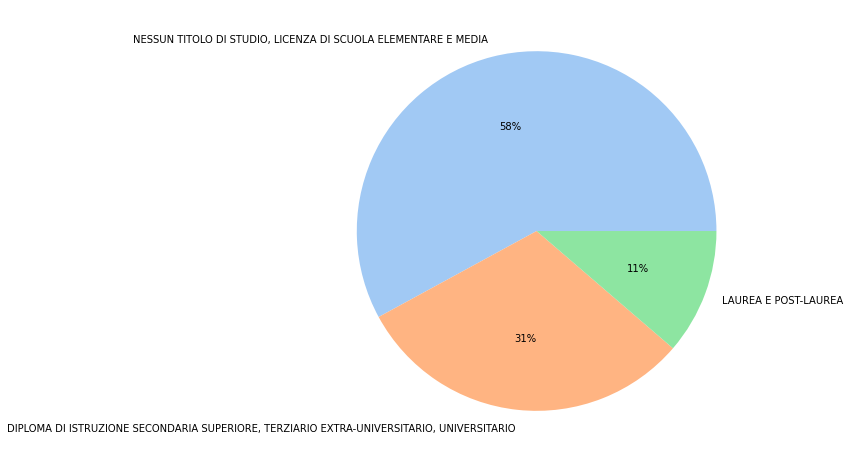

In [66]:
utils.plot_frequency_pie(activated_cleaned, 'TITOLOSTUDIO')

As we expected we are left with three values.

Rename column **VALUE** into **RETRIBUZIONE** for better clarity.

In [67]:
activated_cleaned.rename({'VALUE': 'RETRIBUZIONE'}, axis=1, inplace=True)

## Have a look at the new data

In [68]:
utils.variability_measures(activated_cleaned, 'RETRIBUZIONE', limit=0.2)

Mean on column RETRIBUZIONE: 11.737379926979884
Median on column RETRIBUZIONE: 10.61
Mode on column RETRIBUZIONE: 0    9.6
Name: RETRIBUZIONE, dtype: float64
Range of values on column RETRIBUZIONE: [5.48, 33.54]
Variance on column RETRIBUZIONE: 15.164577042807355
Standard deviation on column RETRIBUZIONE: 3.8941721896710417
Trimmed mean on column RETRIBUZIONE with limit 0.2: 10.846511328704295
Mean absolute deviation on column RETRIBUZIONE: 2.8910196688644363
Median absolute deviation on column RETRIBUZIONE: 2.7246068588361325


Distribution of column **RETRIBUZIONE** and comparison with the logged distribution.

<AxesSubplot:title={'center':'Box log of retributions'}, xlabel='RETRIBUZIONE'>

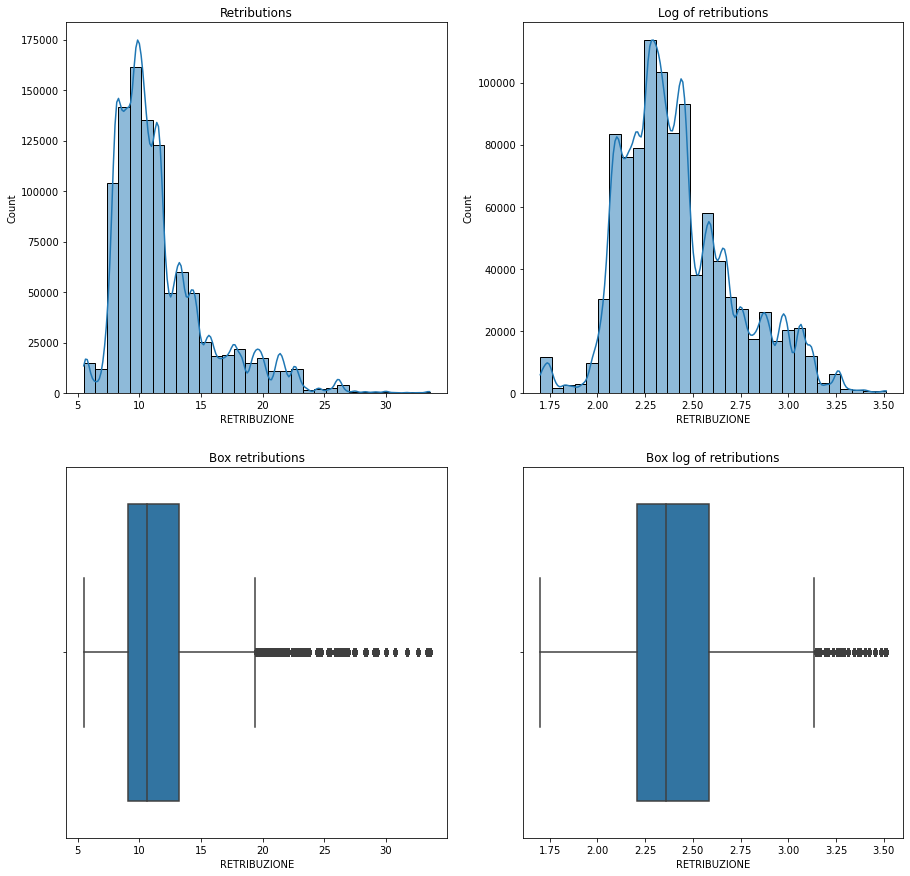

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].set_title('Retributions')
ax[0][1].set_title('Log of retributions')
ax[1][0].set_title('Box retributions')
ax[1][1].set_title('Box log of retributions')
sns.histplot(x=activated_cleaned['RETRIBUZIONE'], kde=True, bins=30, ax=ax[0][0])
sns.histplot(x=np.log(activated_cleaned['RETRIBUZIONE']), kde=True, bins=30, ax=ax[0][1])
sns.boxplot(x=activated_cleaned['RETRIBUZIONE'], ax=ax[1][0])
sns.boxplot(x=np.log(activated_cleaned['RETRIBUZIONE']), ax=ax[1][1])

It seems that the logged values have a distribution more simlar to the normal.
We'll keep both the original values and the values with logarithmic transformation. Later we will evaluate which will provide the best correlations. 

In [70]:
activated_cleaned['LOGRETRIBUZIONE'] = np.log(activated_cleaned['RETRIBUZIONE'])

Evaluate the same thing for the column **ETA**.

<AxesSubplot:title={'center':'Box log of ages'}, xlabel='ETA'>

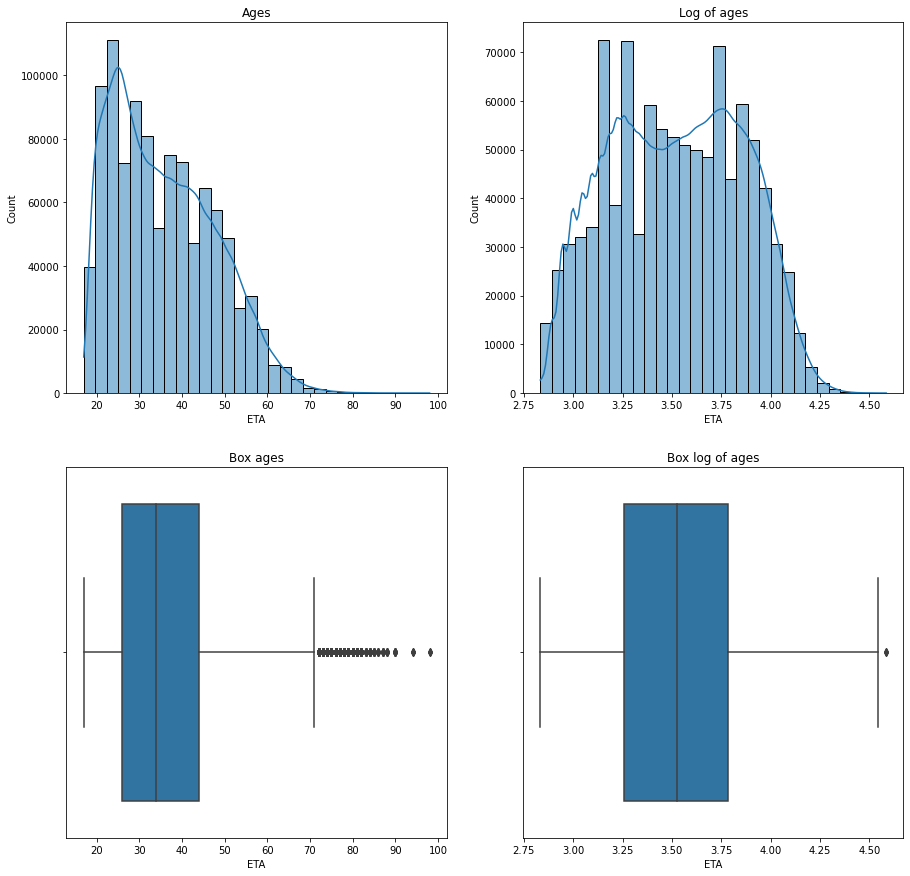

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].set_title('Ages')
ax[0][1].set_title('Log of ages')
ax[1][0].set_title('Box ages')
ax[1][1].set_title('Box log of ages')
sns.histplot(x=activated_cleaned['ETA'], kde=True, bins=30, ax=ax[0][0])
sns.histplot(x=np.log(activated_cleaned['ETA']), kde=True, bins=30, ax=ax[0][1])
sns.boxplot(x=activated_cleaned['ETA'], ax=ax[1][0])
sns.boxplot(x=np.log(activated_cleaned['ETA']), ax=ax[1][1])

Keep also the log of the **ETA** column.

In [72]:
activated_cleaned['LOGETA'] = np.log(activated_cleaned['ETA'])

Distribution of **RETRIBUZIONE** with respect to **TITOLO DI STUDIO** and **GENERE**. Each subset is independently normalized.

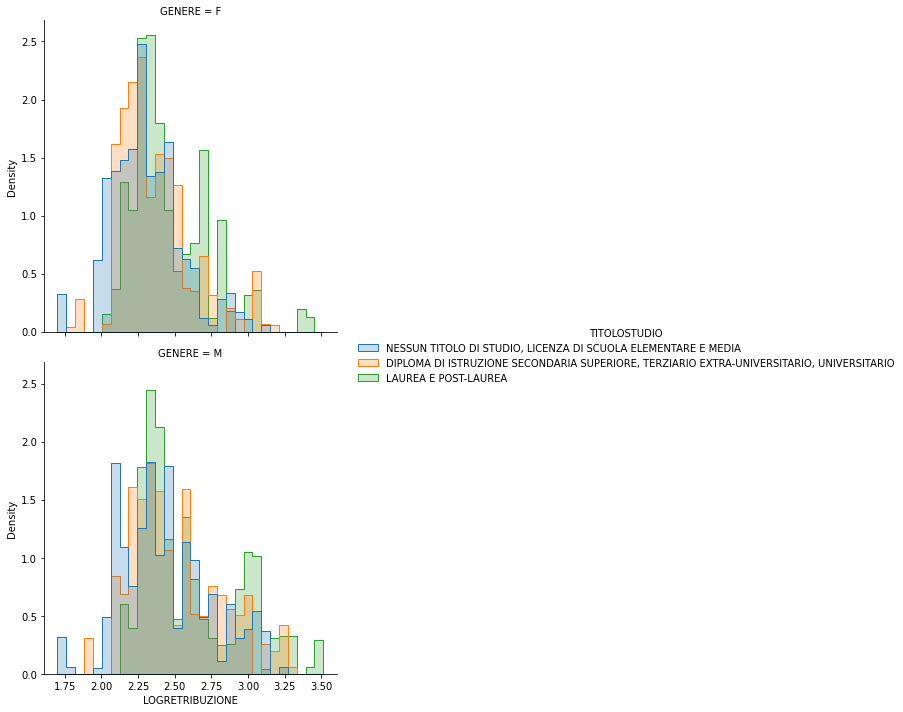

In [73]:
sns.displot(data=activated_cleaned, x='LOGRETRIBUZIONE', hue='TITOLOSTUDIO', row='GENERE', element='step', bins=30, stat='density', common_norm=False)

**RETRIBUZIONE** with respect to **GENERE** and **MODALITALAVORO**.

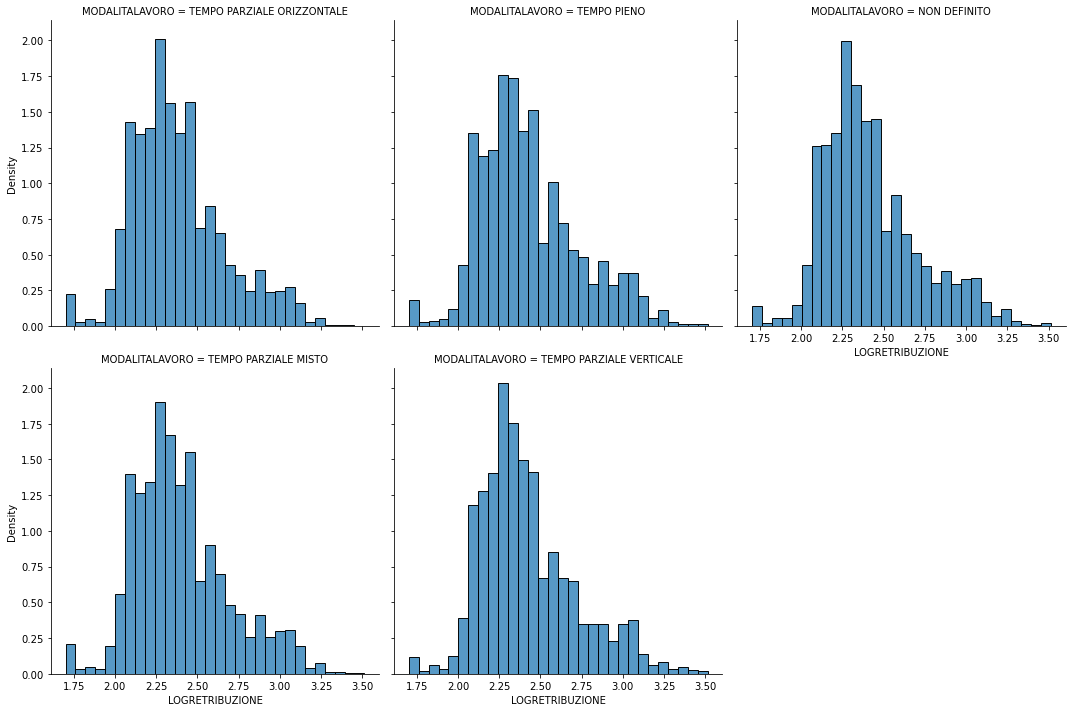

In [74]:
sns.displot(data=activated_cleaned, x='LOGRETRIBUZIONE', col='MODALITALAVORO', col_wrap=3, bins=30, stat='density', common_norm=False)

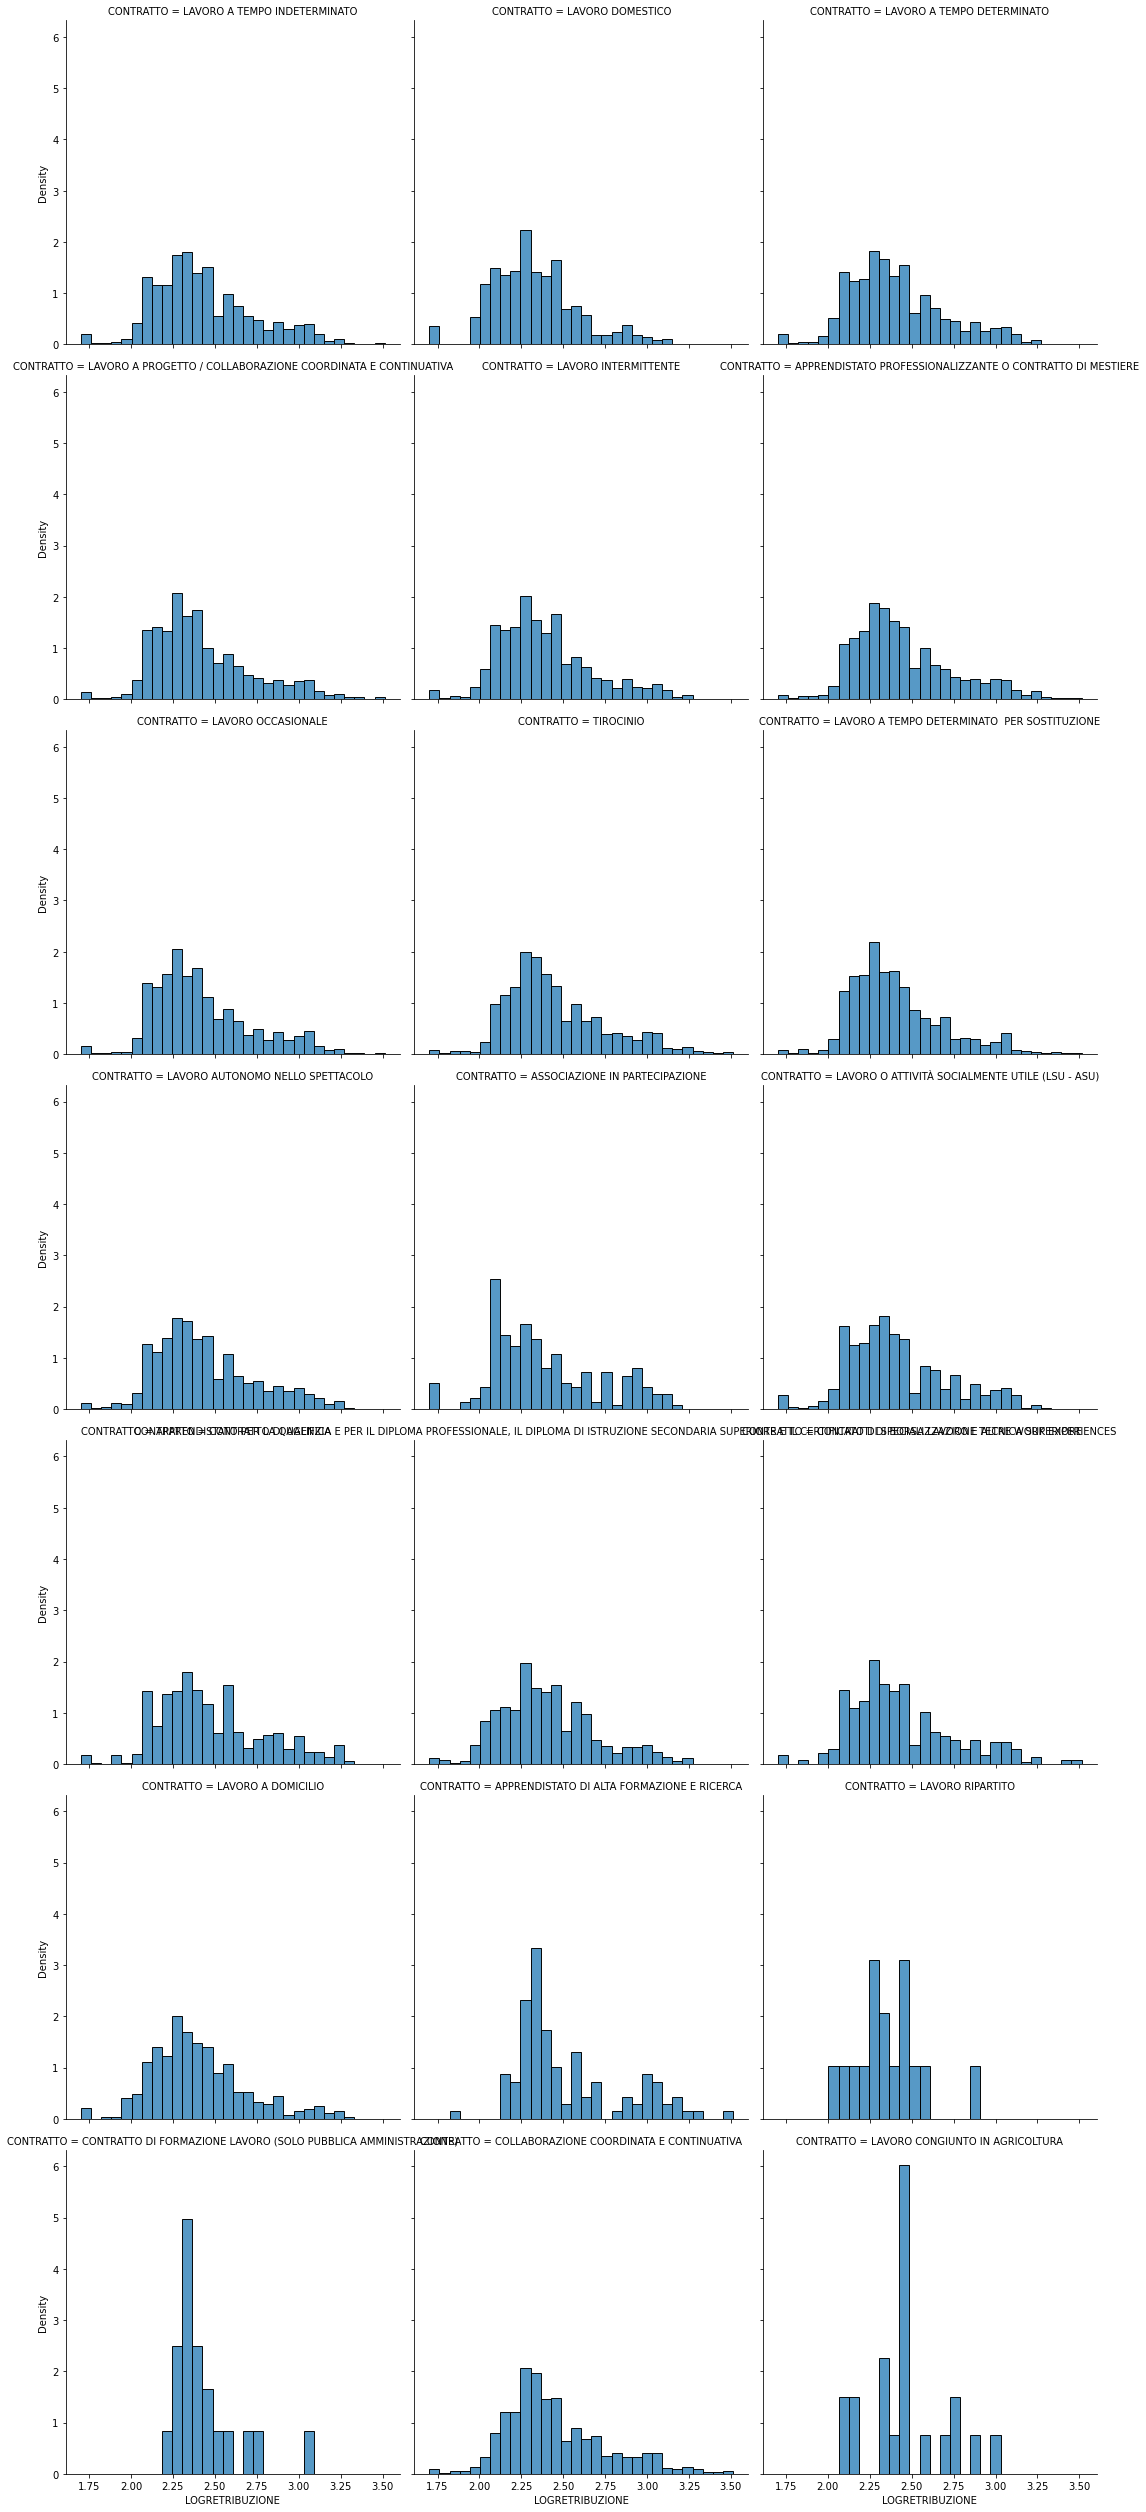

In [75]:
sns.displot(data=activated_cleaned, x='LOGRETRIBUZIONE', col='CONTRATTO', col_wrap=3, bins=30, stat='density', common_norm=False)

**RETRIBUZIONE** with respect to **ETA** and **GENERE**.

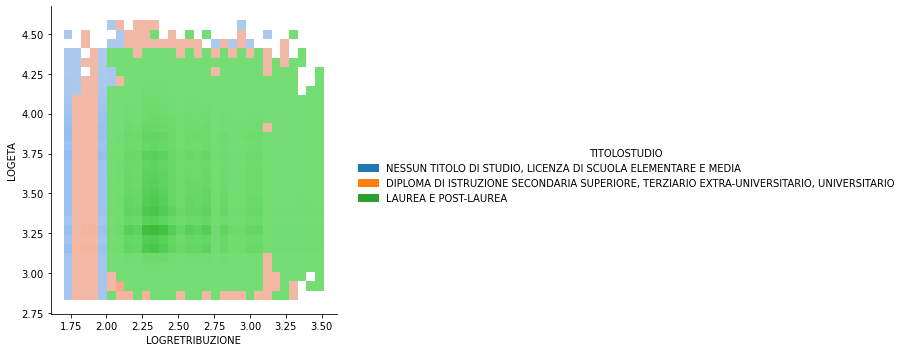

In [76]:
sns.displot(data=activated_cleaned, x='LOGRETRIBUZIONE', y='LOGETA', hue='TITOLOSTUDIO', bins=30)

**RETRIBUZIONE** with respect to **TITOLOSTUDIO** and **GENERE**.

/home/ale/anaconda3/envs/datasciencefb/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


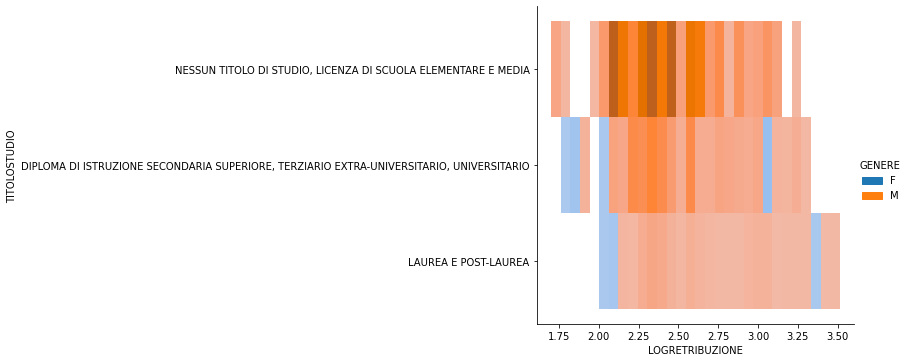

In [77]:
sns.displot(data=activated_cleaned, x='LOGRETRIBUZIONE', y='TITOLOSTUDIO', hue='GENERE', bins=30)

In [74]:
# sns.catplot(x="TITOLOSTUDIO", y="RETRIBUZIONE", hue="GENERE", kind="violin", inner="stick", split=True, palette="pastel", data=activated_cleaned)

## Transformations
* Convert everyting to numerical values.
* Normalize the data.

In this part of the notebook we're performing some transformations on the dataset in order to convert all the categorical features into numerical features, and to let them be more suitable for our predictin purposes.

In [78]:
activated_labours = activated_cleaned.copy()
activated_labours.head()

,DATA,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,ANNO,RETRIBUZIONE,LOGRETRIBUZIONE,LOGETA
0,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,9.52,2.253395,3.89182
1,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,9.49,2.250239,3.89182
2,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,11.51,2.443216,3.89182
3,2014-01-01,F,49,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,VARESE,MAROCCO,2014,9.80,2.282382,3.89182
4,2014-01-01,M,43,"NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELE...",LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,LIBERIA,2014,15.82,2.761275,3.76120


### Transform the data

In [79]:
activated_transformed = pd.DataFrame()

Converting **GENERE** column to dummies.

In [80]:
df_col = activated_labours['GENERE'].values.reshape(-1,1)
df_col

array([['F'],
       ['F'],
       ['F'],
       ...,
       ['F'],
       ['F'],
       ['F']], dtype=object)

In [81]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
enc_gen = OneHotEncoder()
X = enc_gen.fit_transform(df_col).toarray()
X

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [82]:
dfOneHot = pd.DataFrame(X, columns = ['GENERE_F', 'GENERE_M'])
activated_transformed = pd.concat([activated_transformed, dfOneHot], axis=1)
activated_transformed.head()

,GENERE_F,GENERE_M
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


Transforming **TITOLO STUDIO** with manually defined transformation(in order to maintain the ordinal information of data).

[ISTAT document](https://www.istat.it/it/files/2011/01/Classificazione-titoli-studio-28_ott_2005-nota_metodologica.pdf)

In [83]:
activated_labours.TITOLOSTUDIO.unique()

array(['NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA',
       'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO',
       'LAUREA E POST-LAUREA'], dtype=object)

In [84]:
studylevel_mapper = {'NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA': 0,
          'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO': 1,
          'LAUREA E POST-LAUREA': 2,
          }
activated_transformed['TITOLOSTUDIO'] = activated_labours['TITOLOSTUDIO'].replace(studylevel_mapper)
activated_transformed.head()

,GENERE_F,GENERE_M,TITOLOSTUDIO
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [85]:
activated_transformed.TITOLOSTUDIO.unique()

array([ 0.,  1.,  2., nan])

Transforming **MODALITÀ LAVORO** using LabelEncoder.

In [86]:
activated_labours.MODALITALAVORO.unique()

array(['TEMPO PARZIALE ORIZZONTALE', 'TEMPO PIENO', 'NON DEFINITO',
       'TEMPO PARZIALE MISTO', 'TEMPO PARZIALE VERTICALE'], dtype=object)

In [87]:
le_workmode = LabelEncoder()
transformed_col = le_workmode.fit_transform(activated_labours.MODALITALAVORO)
transformed_col

array([2, 2, 2, ..., 0, 0, 0])

In [88]:
activated_transformed['MODALITALAVORO'] = transformed_col
activated_transformed.head()

,GENERE_F,GENERE_M,TITOLOSTUDIO,MODALITALAVORO
0,1.0,0.0,0.0,2
1,1.0,0.0,0.0,2
2,1.0,0.0,0.0,2
3,1.0,0.0,0.0,2
4,0.0,1.0,0.0,4


In [89]:
activated_transformed.MODALITALAVORO.unique()

array([2, 4, 0, 1, 3])

Transforming **PROVINCIA IMPRESA**, **NAZIONALITÀ** and **CONTRATTO**.

In [90]:
activated_labours.PROVINCIAIMPRESA.unique()

array(['VARESE', 'MILANO', 'LECCO', 'BRESCIA', 'COMO', 'MONZA E BRIANZA',
       'CREMONA', 'MANTOVA', 'BERGAMO', 'LODI', 'PAVIA', 'SONDRIO'],
      dtype=object)

In [91]:
le_prov = LabelEncoder()
transformed_prov = le_prov.fit_transform(activated_labours.PROVINCIAIMPRESA)
activated_transformed['PROVINCIAIMPRESA'] = transformed_prov
activated_transformed.head()

,GENERE_F,GENERE_M,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA
0,1.0,0.0,0.0,2,11
1,1.0,0.0,0.0,2,11
2,1.0,0.0,0.0,2,11
3,1.0,0.0,0.0,2,11
4,0.0,1.0,0.0,4,7


In [92]:
activated_labours.NAZIONALITA.unique()

array(['MAROCCO', 'LIBERIA', 'ITALIA', 'ARGENTINA', 'ALBANIA', 'TUNISIA',
       'EGITTO', 'Cinese, Repubblica Popolare', 'BULGARIA', 'ROMANIA',
       'PAKISTAN', 'POLONIA', 'UCRAINA', 'INDIA', 'EL SALVADOR',
       'SENEGAL', 'IRAN', 'FRANCIA', "PERU'", 'CAMERUN', 'NIGERIA',
       'BRASILE', 'SRI LANKA', 'TURCHIA', 'FILIPPINE', 'GHANA', 'ECUADOR',
       'Moldova', "COSTA D'AVORIO", 'SLOVENIA', 'COLOMBIA', 'UNGHERIA',
       'GUINEA', 'BOLIVIA', 'Dominicana, Repubblica', 'SVIZZERA',
       'GERMANIA', 'BANGLADESH', 'IRAQ', 'THAILANDIA',
       'MACEDONIA, ex REP. JUGOSLAVIA', 'SEYCHELLES', 'CUBA', 'ESTONIA',
       'ISRAELE', 'GEORGIA', 'SERBIA', 'KOSOVO', 'TOGO', 'CANADA',
       'LITUANIA', 'SPAGNA', 'LETTONIA', 'NEPAL', 'LIBANO', 'PARAGUAY',
       'RUSSA, Federazione', 'GIORDANIA', 'GRECIA', 'REGNO UNITO', 'CILE',
       'AUSTRIA', 'ETIOPIA', 'PORTOGALLO', 'MESSICO', 'VENEZUELA',
       'BOSNIA-ERZEGOVINA', 'SINGAPORE', 'Mauritius', 'BURKINA FASO',
       'AFGHANISTAN', 'GIAPPON

In [93]:
le_nationality = LabelEncoder()
transformed_nationality = le_nationality.fit_transform(activated_labours.NAZIONALITA)
activated_transformed['NAZIONALITA'] = transformed_nationality
activated_transformed.head()

,GENERE_F,GENERE_M,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA
0,1.0,0.0,0.0,2,11,96
1,1.0,0.0,0.0,2,11,96
2,1.0,0.0,0.0,2,11,96
3,1.0,0.0,0.0,2,11,96
4,0.0,1.0,0.0,4,7,86


In [94]:
le_contract = LabelEncoder()
transformed_contract = le_contract.fit_transform(activated_labours.CONTRATTO)
activated_transformed['CONTRATTO'] = transformed_contract
activated_transformed.head()

,GENERE_F,GENERE_M,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,CONTRATTO
0,1.0,0.0,0.0,2,11,96,12
1,1.0,0.0,0.0,2,11,96,12
2,1.0,0.0,0.0,2,11,96,12
3,1.0,0.0,0.0,2,11,96,12
4,0.0,1.0,0.0,4,7,86,12


Add columns that were already numerical.

In [95]:
activated_transformed['ETA'] = activated_labours['ETA']
activated_transformed['LOGETA'] = activated_labours['LOGETA']
activated_transformed['RETRIBUZIONE'] = activated_labours['RETRIBUZIONE']
activated_transformed['LOGRETRIBUZIONE'] = activated_labours['LOGRETRIBUZIONE']
activated_transformed['DATA'] = activated_labours['DATA']
activated_transformed['ANNO'] = activated_labours['ANNO']
activated_transformed.head()

,GENERE_F,GENERE_M,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,CONTRATTO,ETA,LOGETA,RETRIBUZIONE,LOGRETRIBUZIONE,DATA,ANNO
0,1.0,0.0,0.0,2,11,96,12,49.0,3.89182,9.52,2.253395,2014-01-01,2014.0
1,1.0,0.0,0.0,2,11,96,12,49.0,3.89182,9.49,2.250239,2014-01-01,2014.0
2,1.0,0.0,0.0,2,11,96,12,49.0,3.89182,11.51,2.443216,2014-01-01,2014.0
3,1.0,0.0,0.0,2,11,96,12,49.0,3.89182,9.80,2.282382,2014-01-01,2014.0
4,0.0,1.0,0.0,4,7,86,12,43.0,3.76120,15.82,2.761275,2014-01-01,2014.0


Every feature has been converted into numerical values.

In [96]:
utils.missing_values_table(activated_transformed)

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
TITOLOSTUDIO,1502,0.1
ETA,1502,0.1
LOGETA,1502,0.1
RETRIBUZIONE,1502,0.1
LOGRETRIBUZIONE,1502,0.1
DATA,1502,0.1
ANNO,1502,0.1


In [97]:
activated_transformed.dropna(inplace=True)

In [95]:
#activated_transformed.to_csv('./activated_labours_transformed_reg.csv')

### Scale the data

Apply standardization.

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
ss = StandardScaler()
activated_transformed_temp = activated_transformed.drop('DATA', axis=1)
scaled_labours = pd.DataFrame(data=ss.fit_transform(activated_transformed_temp), columns=activated_transformed_temp.columns)
# scaled_labours['TITOLOSTUDIO'] = activated_transformed['TITOLOSTUDIO']
scaled_labours.dropna(inplace=True)
scaled_labours.head()

,GENERE_F,GENERE_M,TITOLOSTUDIO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA,CONTRATTO,ETA,LOGETA,RETRIBUZIONE,LOGRETRIBUZIONE,ANNO
0,1.102639,-1.102639,-0.774503,-0.664551,1.731165,0.734472,0.376255,1.11446,1.110484,-0.569442,-0.554379,-1.575688
1,1.102639,-1.102639,-0.774503,-0.664551,1.731165,0.734472,0.376255,1.11446,1.110484,-0.577146,-0.565108,-1.575688
2,1.102639,-1.102639,-0.774503,-0.664551,1.731165,0.734472,0.376255,1.11446,1.110484,-0.058403,0.090897,-1.575688
3,1.102639,-1.102639,-0.774503,-0.664551,1.731165,0.734472,0.376255,1.11446,1.110484,-0.497537,-0.455839,-1.575688
4,-0.906915,0.906915,-0.774503,0.763737,0.415937,0.305920,0.376255,0.60979,0.718899,1.048421,1.172101,-1.575688


### Fight unbalanced classes
The classes that we want to predict have an unbalanced distribution. We fix this using **up-sampling** and **down-sampling**.

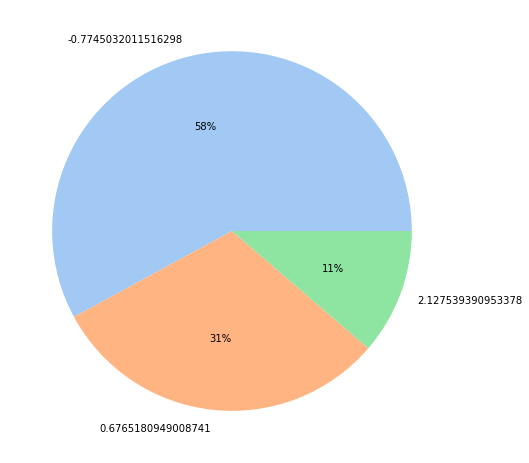

In [100]:
utils.plot_frequency_pie(scaled_labours, 'TITOLOSTUDIO')

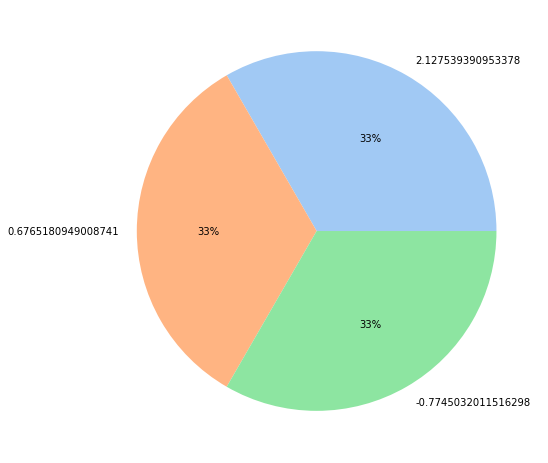

In [101]:
from sklearn.utils import resample

classes = scaled_labours.TITOLOSTUDIO.unique()
first_class = scaled_labours[scaled_labours.TITOLOSTUDIO == classes[2]]
second_class = scaled_labours[scaled_labours.TITOLOSTUDIO == classes[1]]
third_class = scaled_labours[scaled_labours.TITOLOSTUDIO == classes[0]]

first_class_upsample = resample(first_class,
             replace=True,
             n_samples=len(second_class),
             random_state=37)

third_class_downsample = resample(third_class,
             replace=True,
             n_samples=len(second_class),
             random_state=37)

balanced = pd.concat([first_class_upsample, second_class, third_class_downsample])
balanced.reset_index(drop=True, inplace=True)
utils.plot_frequency_pie(balanced, 'TITOLOSTUDIO')

## Correlation

<AxesSubplot:>

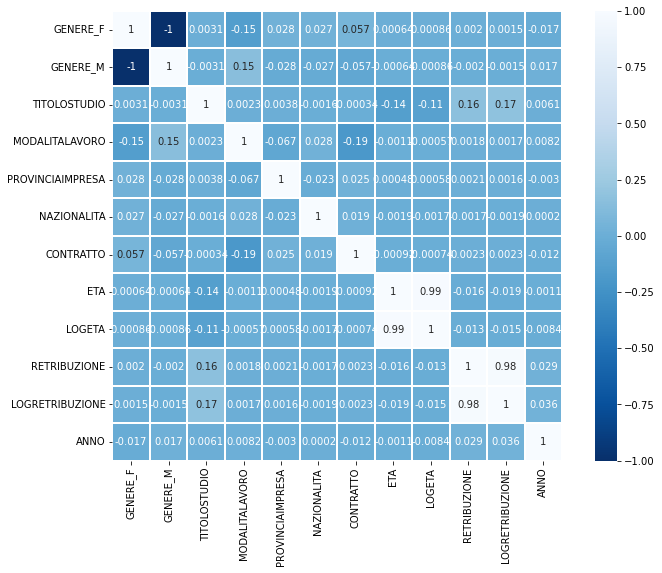

In [102]:
scaled_labours = balanced.copy()
sns.heatmap(scaled_labours.corr(), 
            square=True,
            linewidths=0.2,
            cmap='Blues_r',
            annot=True)

The best correlation is between **LOGRETRIBUZIONE** and **TITOLODISTUDIO**, but there is also a considerable correlation between **ETA** and **TITOLOSTUDIO**.
We'll try to make predictions about **TITOLODISTUDIO** basing on **LOGRETRIBUZIONE** and **ETA**. 

In [103]:
scaled_labours1 = scaled_labours[['TITOLOSTUDIO', 'LOGRETRIBUZIONE', 'ETA']]
scaled_labours1.dropna(axis=0, inplace=True)

<ipython-input-103-48c5e5dab797>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_labours1.dropna(axis=0, inplace=True)


## Predictions

We will compare the predictions computed using different classification models:
* Logistic regression
* XGBoost Random Forest

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve, auc
import xgboost as xgb

/home/ale/anaconda3/envs/datasciencefb/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [105]:
X = scaled_labours1.drop('TITOLOSTUDIO', axis=1)
Y = scaled_labours1['TITOLOSTUDIO'].map({classes[0]: 0, classes[1]: 1, classes[2]: 2})

x = X.values
y = Y.values.astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Logistic Regression
Logistic regression is usually used for binary classification but it can also be used for multiclass classification.
In the latter case the Logistic Regression implemented by SKlearn automatically apply the **OvA (One vs All)** technique by treating the multiclass classification as a series of binary classification tasks.

In [106]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_proba = lr.predict_proba(x_test)
y_pred = lr.predict(x_test)

print("ACCURACY: "+str(accuracy_score(y_test, y_pred)))
print("F1 SCORE(macro): "+str(f1_score(y_test, y_pred, average='macro')))
print("LOG LOSS: "+str(log_loss(y_test, y_pred_proba)))

ACCURACY: 0.4107907355081771
F1 SCORE(macro): 0.40931608527901825
LOG LOSS: 1.0705234349604484


Definition of some useful functions for evaluate models performances through plotting.
In particular we define a function for plotting of some ROC auc curves:
* micro-average auc
* macro-average auc
* per class auc

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

In [107]:
def inverse_map(array_classes):
  
  vect = np.vectorize(lambda x:studylevel_mapper[x])
  return vect(array_classes)

def plot_distribution_comparison(y_test, y_pred, label_length):
  studylevel_mapper = {0: 'NESSUN TITOLO DI STUDIO, LICENZA DI SCUOLA ELEMENTARE E MEDIA',
                       1: 'DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE, TERZIARIO EXTRA-UNIVERSITARIO, UNIVERSITARIO',
                       2: 'LAUREA E POST-LAUREA',
                      }
  predictions = pd.DataFrame({'True': y_test, 'Predictions': y_pred})
  g = sns.histplot(predictions, multiple='dodge', shrink=5)
  g.set_xticks(range(3))
  g.set_xticklabels([studylevel_mapper[0][:label_length]+'...',studylevel_mapper[1][:label_length]+'...',studylevel_mapper[2][:label_length]+'...'])
  return predictions

def roc(y_test, y_score):
  n_classes = 3
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  lw = 2
  colors = ["aqua", "darkorange", "cornflowerblue"]
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC curve")
  plt.legend(loc="lower right")
  plt.show()

def multiclass_to_onehot(y_test):
  y_test_one_hot = np.zeros((y_test.size, y_test.max()+1))
  y_test_one_hot[np.arange(y_test.size), y_test] = 1
  return y_test_one_hot

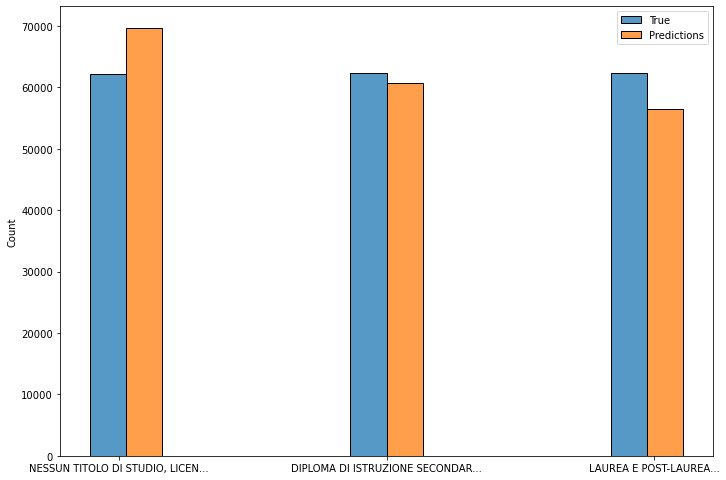

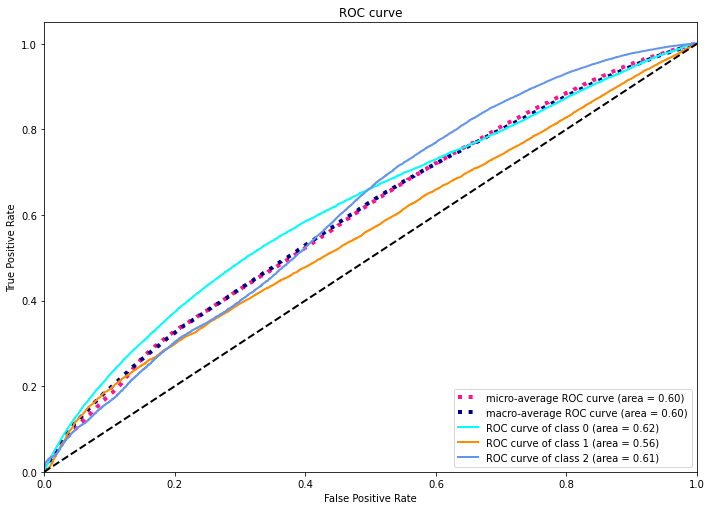

array([1, 2, 0])

In [108]:
predictions = plot_distribution_comparison(y_test, y_pred, 30)
roc(multiclass_to_onehot(y_test), y_pred_proba)
predictions.Predictions.unique()

The lack of correlation has resulted in lack of predictive power regarding Logistic Regression. We try with a more powerful model.

### XGBoost Random Forest
XGBoost implements an ensamble algorithm based on decision trees similar to random forest.

In [109]:
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

Apply a cross validation

In [110]:
params = {"objective": 'multi:softmax', 'num_class':3, 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=37)

cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.662093,0.001013,0.661908,0.000528
1,0.705915,0.015641,0.705956,0.014355
2,0.709562,0.006307,0.709455,0.004964
3,0.714261,0.009793,0.714067,0.009183
4,0.718261,0.008600,0.717916,0.008657
5,0.720268,0.006536,0.719899,0.007011
6,0.726567,0.005741,0.726186,0.004930
7,0.731061,0.004787,0.730666,0.003915
8,0.733480,0.004413,0.733208,0.003817
9,0.733568,0.004628,0.733363,0.004214


Fit the model

In [111]:
model = xgb.XGBClassifier(params=params, num_boost_round=cv_results.shape[0], use_label_encoder=False)
model.fit(x_train, y_train)

[17:01:26] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:01:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_boost_round=50, num_parallel_tree=1,
              objective='multi:softprob',
              params={'alpha': 10, 'colsample_bytree': 0.3,
                      'learning_rate': 0.1, 'max_depth': 5, 'num_class': 3,
                      'objective': 'multi:softmax'},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, ...)

In [112]:
preds = model.predict(x_test)
preds_proba = model.predict_proba(x_test)

In [113]:
print("ACCURACY: "+str(accuracy_score(y_test, preds)))
print("F1 SCORE(macro): "+str(f1_score(y_test, preds, average='macro')))
print("LOG LOSS: "+str(log_loss(y_test, preds_proba)))

ACCURACY: 0.749159816765134
F1 SCORE(macro): 0.7487722776829325
LOG LOSS: 0.5994695192249554


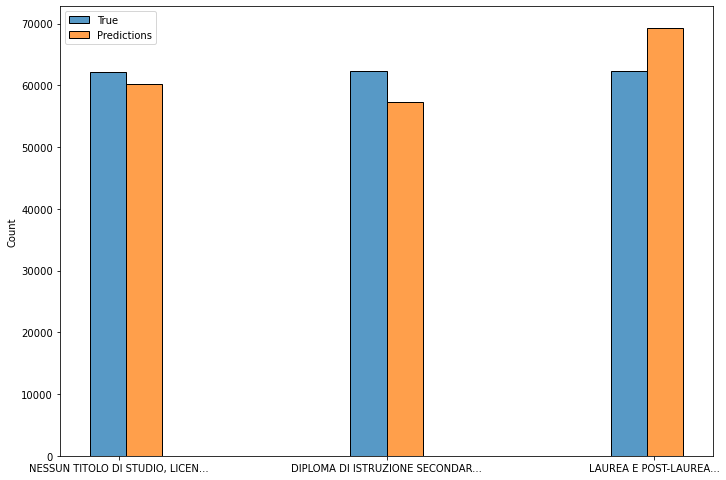

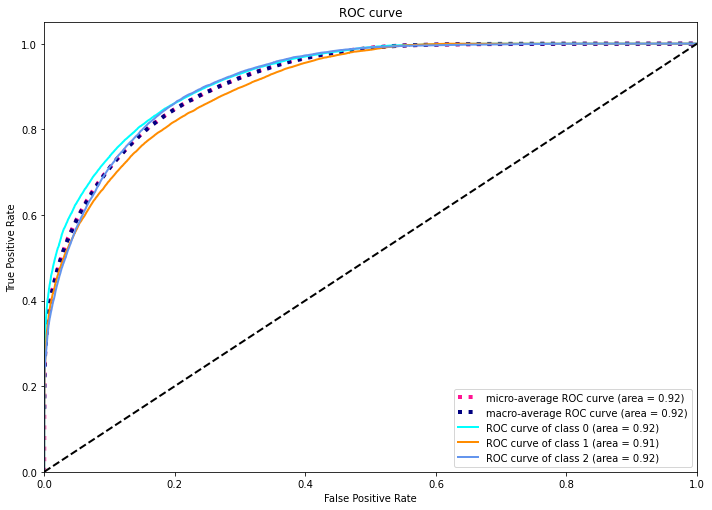

array([1, 0, 2])

In [114]:
predictions1 = plot_distribution_comparison(y_test, preds, 30)
roc(multiclass_to_onehot(y_test), preds_proba)
predictions1.Predictions.unique()

This time we have very good predictions despite the lack of correlation.

Have a look at the feature importances.

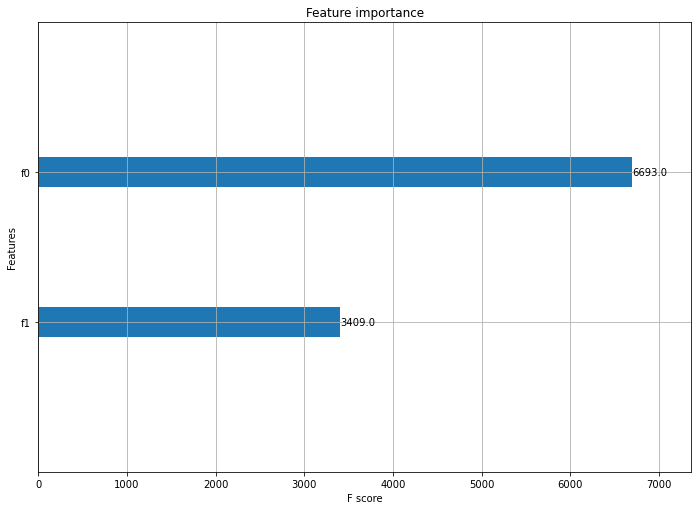

In [116]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = a4_dims
plt.show()

### Naive Bayes
Classification based on Bayes Theorem tends to have good performances when dealing with independent variables. See if it could be useful in this situation.

In [117]:
bayes_model = naive_bayes.GaussianNB()
bayes_model.fit(x_train, y_train)

preds = bayes_model.predict(x_test)
proba_preds = bayes_model.predict_proba(x_test)

In [118]:
print("ACCURACY: "+str(accuracy_score(y_test, preds)))
print("F1 SCORE(macro): "+str(f1_score(y_test, preds, average='macro')))
print("LOG LOSS: "+str(log_loss(y_test, proba_preds)))

ACCURACY: 0.44276586180323657
F1 SCORE(macro): 0.43987452141963873
LOG LOSS: 1.0652300366972363


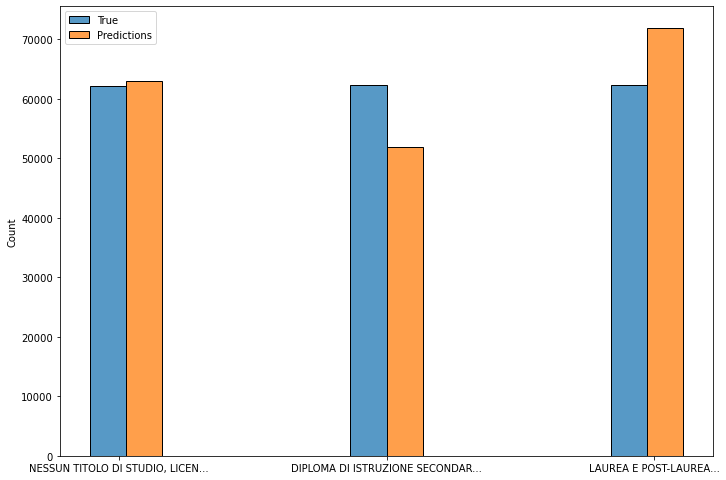

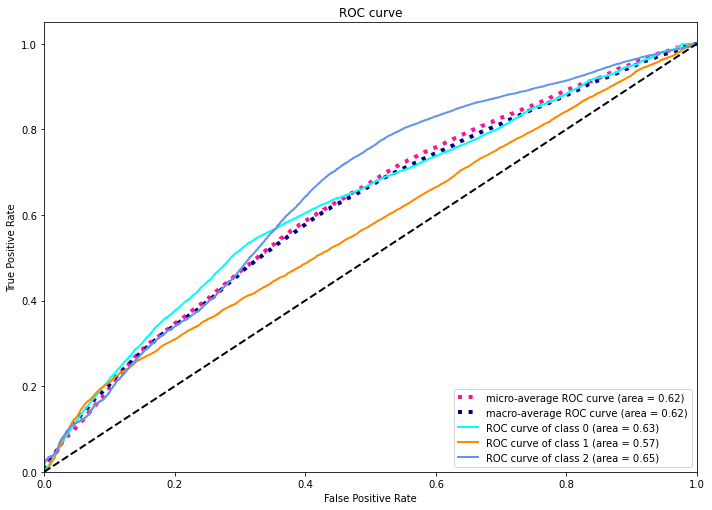

array([1, 2, 0])

In [119]:
predictions2 = plot_distribution_comparison(y_test, preds, 30)
roc(multiclass_to_onehot(y_test), proba_preds)
predictions2.Predictions.unique()

The best relults have been reached with xgboost classification.

What we can do to improve our results:
* Keep more classes by performing less reduction.
* Add more data as **panel data**.
* Create new features with the ones already avaliable.
* Try representing data in a different space.
* Try DeepLearning strategies.